In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [72]:
f = open('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv', 'r')
data = pd.read_csv(f)
f.close()
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [73]:
y_train = np.array(data['quality'])
print(y_train)

[5 5 5 ... 6 5 6]


In [74]:
X_train = np.array(data.iloc[:,:11])
print(X_train)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [75]:
#feature scaling via z_score normalization
mean_X = np.mean(X_train, axis = 0)
sigma_X = np.std(X_train, axis = 0)
X_train_z = (X_train-mean_X)/sigma_X

mean_y = np.mean(y_train, axis = 0)
sigma_y = np.std(y_train, axis = 0)
y_train_z = (y_train - mean_y)/sigma_y
print(X_train_z)
print(y_train_z)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]
[-0.78782264 -0.78782264 -0.78782264 ...  0.45084835 -0.78782264
  0.45084835]


In [76]:
def compute_cost(X, y, w, b):
    #X = np.ndarray(m, n): X[i,j] = value of jth feature in ith training example
    #y = np.ndarray(m,): y[i] = target value in ith training example
    #w = np.ndarray(n,):w[j] = weight for jth feature
    #b = scalar: bias
    #returns total cost, a scalar
    cost = 0
    m = X.shape[0]
    for i in range(m):
        cost += (np.dot(w, X[i])+b-y[i])**2
    return cost/(2*m)

In [77]:
def compute_gradient(X, y, w, b):
    #X = np.ndarray(m, n): X[i,j] = value of jth feature in ith training example
    #y = np.ndarray(m,): y[i] = target value in ith training example
    #w = np.ndarray(n,):w[j] = weight for jth feature
    #b = scalar: bias
    #returns a tuple (dj_dw, dj_db) where
    #dj_dw = np.ndarray(n,): dj_dw[j] = part. deriv. of J wrt w[j] and
    #dj_db = scalar = part. deriv. of J wrt b
    m = X.shape[0]
    n = X.shape[1]
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        err = np.dot(w, X[i])+b-y[i]
        dj_dw += err*X[i]
        dj_db += err
    return dj_dw/m, dj_db/m

In [78]:
import copy
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, gradient_function, cost_function):
    #returns w, b, and J_history
    w = copy.deepcopy(w_in)
    b = b_in
    J_history = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w -= alpha*dj_dw
        b -= alpha*dj_db
        if i<100000:
            J_history.append(cost_function(X, y, w, b))
    return w, b, J_history
        

In [79]:
m = X_train_z.shape[0]
n = X_train_z.shape[1]
w_init = np.zeros(n)
b_init = 0
tmp_alpha = 1e-1
iterations = 1000
w_final, b_final, j_history = gradient_descent(X_train_z, y_train_z, w_init, b_init, tmp_alpha, iterations, compute_gradient, compute_cost)
print(w_final, b_final)

[ 0.05400926 -0.2402604  -0.04405235  0.02855011 -0.10921939  0.05648031
 -0.13296455 -0.04190486 -0.07901039  0.19235067  0.36440603] -1.2772372972335959e-15


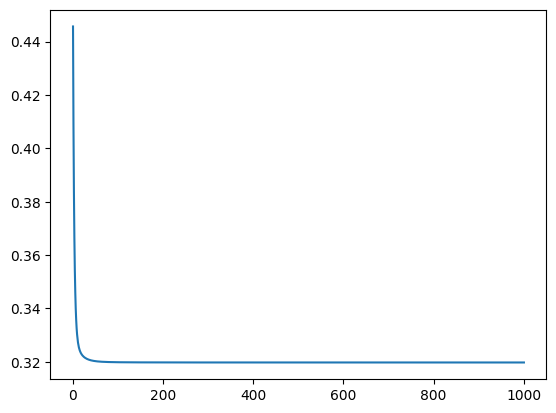

In [80]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, len(j_history)+1), j_history)
plt.show()

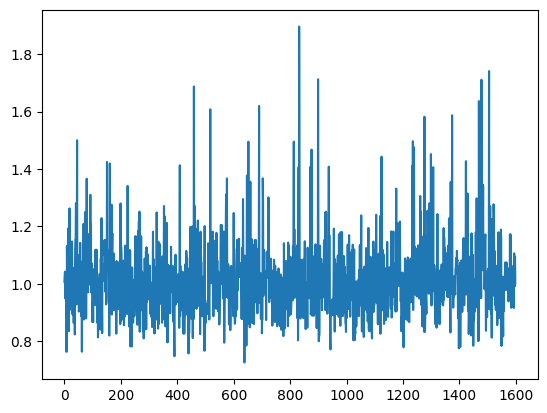

0.5004895482415825
2.6891842088310662
0.0007497401500824452


In [81]:
ratios_predicted_to_actual = []
error = np.zeros(m)
for i in range(m):
    prediction = (np.dot(w_final, X_train_z[i])+b_final)*sigma_y + mean_y
    actual = y_train[i]
    ratios_predicted_to_actual.append(prediction/actual)
    error[i] = abs(prediction-actual)
plt.plot(ratios_predicted_to_actual)
plt.show()#high density around y = 1 shows that prediction~actual for many values.
print(np.mean(error))
print(np.max(error))
print(np.min(error))